# Country_wide_COVID 19_Datasets 

Content
The dataset contains data about the numbers of tests, cases, deaths, serious/critical cases, active cases and recovered cases in each country for every day since April 18, and also contains the population of each country to calculate per-capita penetration of the virus

Additionally, an auxiliary table with information about the fraction of the general population at different age groups for every country is added (taken from Wikipedia). This is specifically relevant since COVID-19 death rate is very much age dependent.

Acknowledgements
The people at "www.worldometers.info" collecting and maintaining this site really are doing very important work
https://www.worldometers.info/coronavirus/#countries

Data about age structure for every country comes from wikipedia

Inspiration
It's possible to use this dataset for various purposes and analyses
The goal will be to use the additional data about the number of tests performed in each country to estimate the true death rate of COVID-19 and examine the relationship with age .(Considered both files for understanding the scenario.)



In [1]:
# Importing necesssary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [56]:
#Loading Dataset 1
df_age=pd.read_csv("population_structure_by_age_per_contry.csv")
df_age

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185
...,...,...,...,...
208,St. Barth,NaN,NaN,NaN
209,Western Sahara,NaN,NaN,NaN
210,Anguilla,NaN,NaN,NaN
211,Lesotho,0.354,0.601,0.045


In [10]:
#Loading Dataset 2
df_cases=pd.read_csv("worldometer_snapshots_April18_to_May18.csv")
df_cases.head(20)

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
5,2020-04-18,Italy,60471924,1305833.0,175925.0,23227.0,44927.0,2733.0,107771.0
6,2020-04-18,France,65256826,463662.0,151793.0,19323.0,35983.0,5833.0,96487.0
7,2020-04-18,Germany,83752855,1728357.0,143724.0,4538.0,85400.0,2922.0,53786.0
8,2020-04-18,Turkey,84230075,598933.0,82329.0,1890.0,10453.0,1894.0,69986.0
9,2020-04-18,Iran,83862642,330137.0,80868.0,5031.0,55987.0,3513.0,19850.0


In [6]:
df_cases.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [18]:
df_cases[df_cases['Country']=='China']
# China's Total Tests' data is missing

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
12,2020-04-18,China,1439323776,NaN,82719.0,4632.0,77029.0,85.0,1058.0
225,2020-04-19,China,1439323776,NaN,82735.0,4632.0,77062.0,85.0,1041.0
438,2020-04-20,China,1439323776,NaN,82747.0,4632.0,77084.0,81.0,1031.0
651,2020-04-21,China,1439323776,NaN,82758.0,4632.0,77123.0,82.0,1003.0
864,2020-04-22,China,1439323776,NaN,82788.0,4632.0,77151.0,78.0,1005.0
1077,2020-04-23,China,1439323776,NaN,82798.0,4632.0,77207.0,63.0,959.0
1290,2020-04-24,China,1439323776,NaN,82804.0,4632.0,77257.0,57.0,915.0
1503,2020-04-25,China,1439323776,NaN,82816.0,4632.0,77346.0,49.0,838.0
1716,2020-04-26,China,1439323776,NaN,82827.0,4632.0,77394.0,51.0,801.0
1929,2020-04-27,China,1439323776,NaN,82830.0,4633.0,77474.0,52.0,723.0


In [19]:
df_cases.tail()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0
6602,2020-05-18,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0


In [20]:
# Let's Have a look on India's Status
df_India = df_cases[df_cases['Country'] == 'India']

In [22]:
df_India.tail()
# Serious or critical data is missing from India

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
5548,2020-05-14,India,1378381772,1947041.0,81997.0,2649.0,27969.0,NaN,51379.0
5761,2020-05-15,India,1378381772,2039952.0,85784.0,2753.0,30258.0,NaN,52773.0
5974,2020-05-16,India,1378381772,2134277.0,90648.0,2871.0,34224.0,NaN,53553.0
6187,2020-05-17,India,1378381772,2227642.0,95698.0,3025.0,36795.0,NaN,55878.0
6400,2020-05-18,India,1378381772,2302792.0,100328.0,3156.0,39233.0,NaN,57939.0


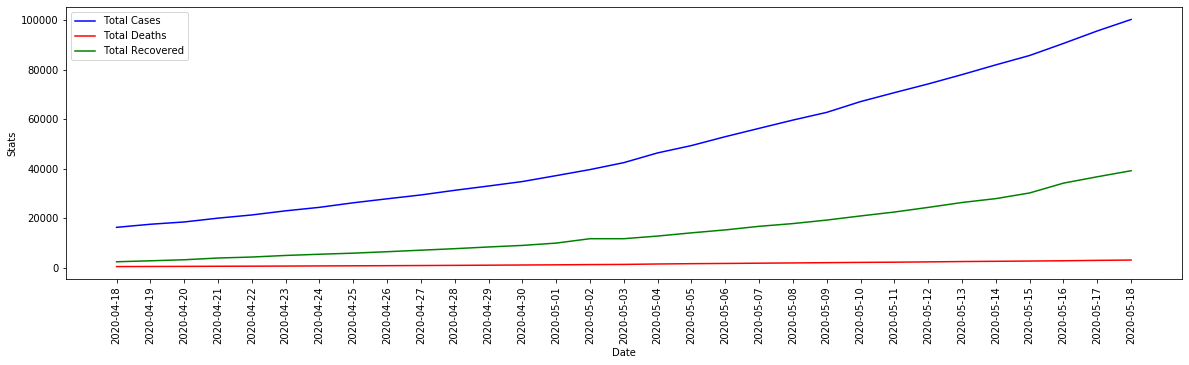

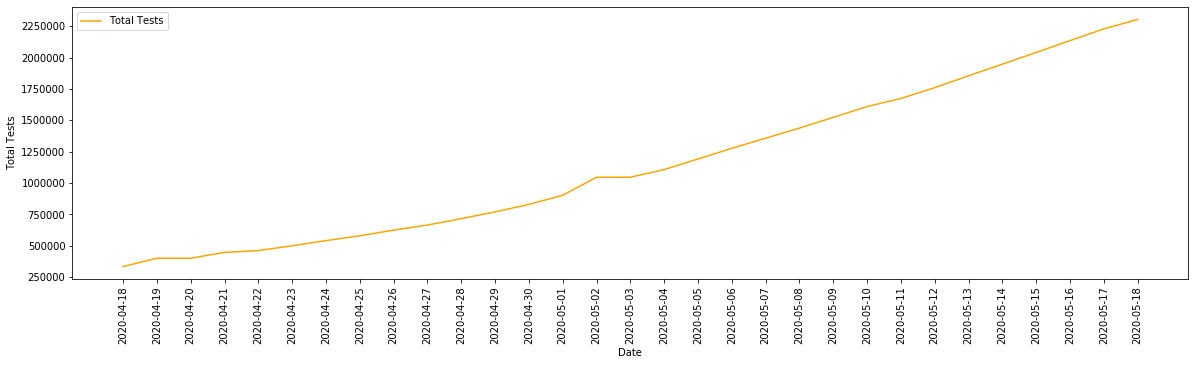

In [34]:
# Plot datewise 
plt.figure(figsize=(20,5))
sns.lineplot(x = 'Date', y = 'Total Cases', color = 'blue', data=df_India)
sns.lineplot(data=df_India, x = 'Date', y = 'Total Deaths', color = 'red')
sns.lineplot(data=df_India, x = 'Date', y = 'Total Recovered', color = 'green')
plt.xlabel('Date')
plt.ylabel('Stats')
plt.xticks(rotation=90)
plt.legend(['Total Cases', 'Total Deaths' ,'Total Recovered'])
plt.show()
plt.figure(figsize=(20,5))
sns.lineplot(data=df_India, x = 'Date', y = 'Total Tests', color = 'orange')
plt.xticks(rotation=90)
plt.legend(['Total Tests'])
plt.show()

# Total Cases have been rising continously, while gap between recovered and Total Cases is increasing
# Total Tests in India is increasing at  very high rate

In [40]:
# Top 10 Countries based on Confirmed Cases as on latest Date
result = df_cases[df_cases['Date']=='2020-05-18'].sort_values(by='Total Cases', ascending=False)[:10].reset_index()
result

,index,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,6390,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0
1,6391,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0
2,6392,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0
3,6393,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0
4,6394,2020-05-18,UK,67844241,2682716.0,246406.0,34796.0,NaN,1559.0,NaN
5,6395,2020-05-18,Italy,60471924,3041366.0,225886.0,32007.0,127326.0,749.0,66553.0
6,6396,2020-05-18,France,65256826,1384633.0,179927.0,28239.0,61728.0,1998.0,89960.0
7,6397,2020-05-18,Germany,83752855,3147771.0,177289.0,8123.0,154600.0,1133.0,14566.0
8,6398,2020-05-18,Turkey,84230075,1650135.0,150593.0,4171.0,111577.0,903.0,34845.0
9,6399,2020-05-18,Iran,83862642,701640.0,122492.0,7057.0,95661.0,2294.0,19774.0


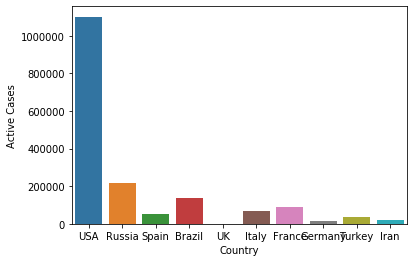

In [42]:
sns.barplot(x='Country',y='Active Cases',data=result)
# US Active Cases are max as on date 18th May, 2020

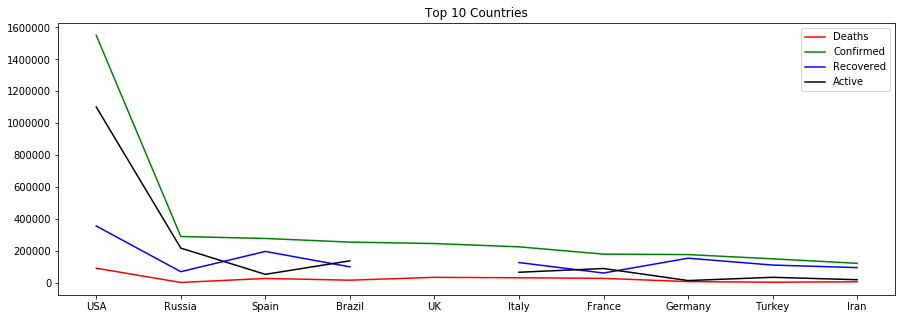

In [48]:
# Top 10 Countries Line Plot
plt.figure(figsize=(15, 5))
plt.plot(result['Country'], result['Total Deaths'],color='red',label='Deaths')
plt.plot(result['Country'], result['Total Cases'],color='green',label='Confirmed')
plt.plot(result['Country'], result['Total Recovered'], color='blue',label='Recovered')
plt.plot(result['Country'], result['Active Cases'], color='black',label='Active')
plt.title('Top 10 Countries')
plt.legend()
plt.show()

In [49]:
# Let's see Date wise results
df_date = df_cases.groupby('Date').sum().reset_index()
df_date

,Date,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,7748754715,19847624.0,2330045.0,160032.0,595244.0,55258.0,1574175.0
1,2020-04-19,7748754715,20565761.0,2405050.0,164994.0,623676.0,54218.0,1615786.0
2,2020-04-20,7748754715,21597361.0,2479782.0,170382.0,645090.0,56756.0,1663716.0
3,2020-04-21,7748754715,22614613.0,2555027.0,177444.0,688988.0,57247.0,1688001.0
4,2020-04-22,7748754715,23334041.0,2634998.0,184051.0,716205.0,56682.0,1734148.0
5,2020-04-23,7748754715,24427775.0,2716085.0,190513.0,744174.0,58692.0,1780804.0
6,2020-04-24,7748754715,25574910.0,2827896.0,197076.0,797132.0,58527.0,1833094.0
7,2020-04-25,7748754715,26861236.0,2918683.0,203149.0,835373.0,58198.0,1879567.0
8,2020-04-26,7748754715,27975924.0,2992542.0,206900.0,876172.0,57596.0,1908876.0
9,2020-04-27,7748754715,28987035.0,3061748.0,211432.0,920075.0,56293.0,1929647.0


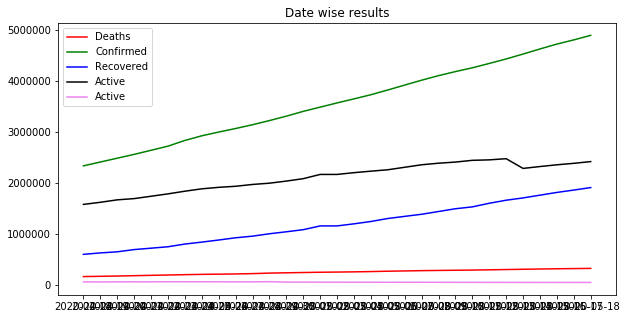

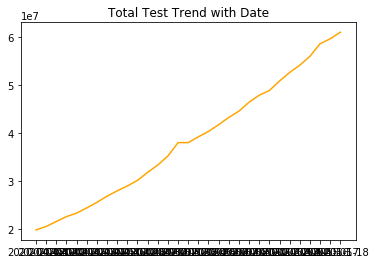

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(df_date['Date'], df_date['Total Deaths'],color='red',label='Deaths')
plt.plot(df_date['Date'], df_date['Total Cases'],color='green',label='Confirmed')
plt.plot(df_date['Date'], df_date['Total Recovered'], color='blue',label='Recovered')
plt.plot(df_date['Date'], df_date['Active Cases'], color='black',label='Active')
plt.plot(df_date['Date'], df_date['Serious or Critical'], color='violet',label='Active')
plt.title('Date wise results')
plt.legend()
plt.show()
plt.plot(df_date['Date'], df_date['Total Tests'], color='orange',label='Active')
plt.title('Total Test Trend with Date')
plt.show()

# Let's define target variable- Death Rate

In [66]:
df_cases['Death_Rate'] = df_cases['Total Deaths'] / df_cases['Total Cases']*100
# Taking latest date as our data to be used
df=df_cases[df_cases['Date']=='2020-05-18']
df.shape

(213, 10)

In [67]:
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Death_Rate
6390,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0,5.933133
6391,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0,0.936431
6392,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0,9.960530
6393,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0,6.599496
6394,2020-05-18,UK,67844241,2682716.0,246406.0,34796.0,NaN,1559.0,NaN,14.121409


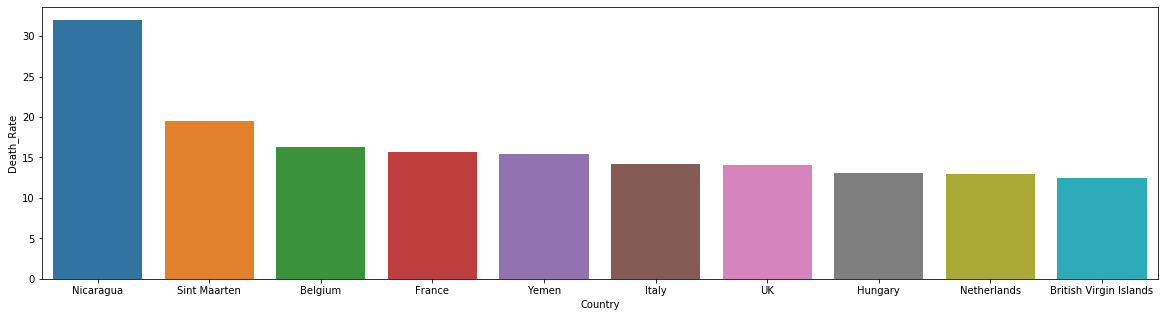

In [68]:
# Top 10 Countries with Death Rates
plt.figure(figsize=(20,5))
sns.barplot(x='Country',y='Death_Rate',data=df.sort_values(by='Death_Rate', ascending=False)[:10])
plt.show()

# Let's combine Age Dataset

In [70]:
df.shape,df_age.shape

((213, 10), (213, 4))

In [72]:
# Perfect: Wecan merge them based on Countries
df=pd.merge(df, df_age, on="Country")
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Death_Rate,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0,5.933133,0.189,0.657,0.154
1,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0,0.936431,0.176,0.682,0.142
2,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0,9.960530,0.147,0.659,0.194
3,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0,6.599496,0.217,0.697,0.086
4,2020-05-18,UK,67844241,2682716.0,246406.0,34796.0,NaN,1559.0,NaN,14.121409,0.177,0.638,0.185


In [73]:
# Let's drop date as it is common
df.drop('Date',axis=1,inplace=True)

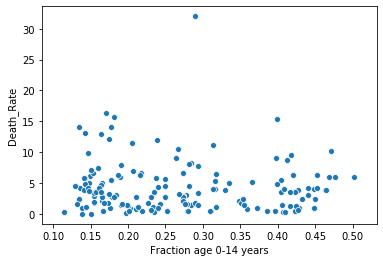

In [78]:
# Plotting Death Rate vs Fraction age 0-14 years population in each country
sns.scatterplot(x='Fraction age 0-14 years',y='Death_Rate',data=df)

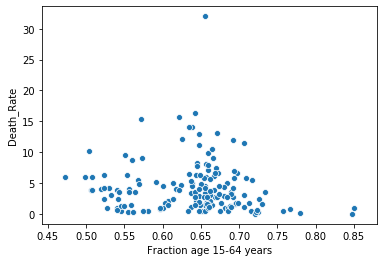

In [79]:
# Plotting Death Rate vs Fraction age 15-64 years population in each country
sns.scatterplot(x='Fraction age 15-64 years',y='Death_Rate',data=df)

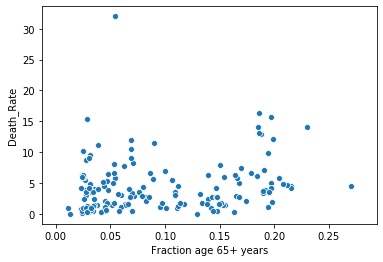

In [80]:
# Plotting Death Rate vs Fraction Fraction age 65+ years population in each country
sns.scatterplot(x='Fraction age 65+ years',y='Death_Rate',data=df)

In [84]:
# Let's see avg.in each age groups
df['Fraction age 65+ years'].mean(),df['Fraction age 15-64 years'].mean(),df['Fraction age 0-14 years'].mean()

(0.08773068181818183, 0.6361090909090911, 0.27609772727272713)

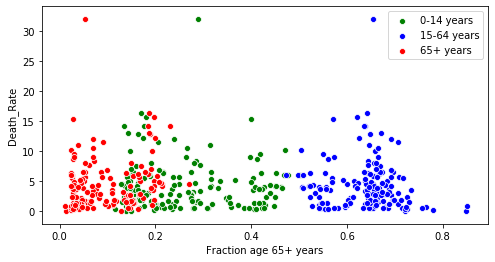

In [90]:
# Let's see all 3 scatterplots together
plt.figure(figsize=(8,4))
sns.scatterplot(x='Fraction age 0-14 years',y='Death_Rate',data=df,color='green',label='0-14 years')
sns.scatterplot(x='Fraction age 15-64 years',y='Death_Rate',data=df,color='blue',label='15-64 years')
sns.scatterplot(x='Fraction age 65+ years',y='Death_Rate',data=df,color='red',label='65+ years')
plt.legend()
plt.show()

In [91]:
df.columns

Index(['Country', 'Population', 'Total Tests', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Serious or Critical', 'Active Cases', 'Death_Rate',
       'Fraction age 0-14 years', 'Fraction age 15-64 years',
       'Fraction age 65+ years'],
      dtype='object')

In [92]:
df.dtypes

Country                      object
Population                    int64
Total Tests                 float64
Total Cases                 float64
Total Deaths                float64
Total Recovered             float64
Serious or Critical         float64
Active Cases                float64
Death_Rate                  float64
Fraction age 0-14 years     float64
Fraction age 15-64 years    float64
Fraction age 65+ years      float64
dtype: object

# Let's Prepare Dataframe for modelling

In [103]:
df=pd.merge(df_cases, df_age, on="Country")
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Death_Rate,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,5.280783,0.189,0.657,0.154
1,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,5.309152,0.189,0.657,0.154
2,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,5.362790,0.189,0.657,0.154
3,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,5.535063,0.189,0.657,0.154
4,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,5.615417,0.189,0.657,0.154


In [104]:
df.shape

(6603, 13)

In [105]:
df.isnull().sum()
# Let's fill them with zero

Date                           0
Country                        0
Population                     0
Total Tests                 1098
Total Cases                   49
Total Deaths                1236
Total Recovered              285
Serious or Critical         2486
Active Cases                  59
Death_Rate                  1236
Fraction age 0-14 years     1147
Fraction age 15-64 years    1147
Fraction age 65+ years      1147
dtype: int64

In [106]:
df=df.fillna(0)
df.isnull().sum()

Date                        0
Country                     0
Population                  0
Total Tests                 0
Total Cases                 0
Total Deaths                0
Total Recovered             0
Serious or Critical         0
Active Cases                0
Death_Rate                  0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
dtype: int64

In [107]:
#Let's Label Encode Date and Country Features

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Date']=le.fit_transform(df['Date'])
df['Country']=le.fit_transform(df['Country'])

In [108]:
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Death_Rate,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,0,201,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,5.280783,0.189,0.657,0.154
1,1,201,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,5.309152,0.189,0.657,0.154
2,2,201,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,5.362790,0.189,0.657,0.154
3,3,201,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,5.535063,0.189,0.657,0.154
4,4,201,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,5.615417,0.189,0.657,0.154


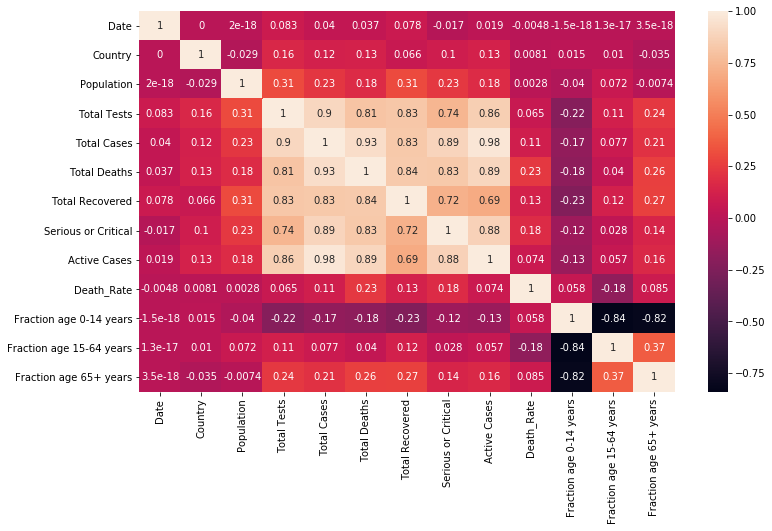

In [101]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

In [109]:
# Treating for outliers
from scipy.stats import zscore
z = abs(zscore(df))
print(df.shape)
df=df[(z<3).all(axis=1)]
print(df.shape)

(6603, 13)
(6156, 13)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000002689563608>,
      dtype=object)

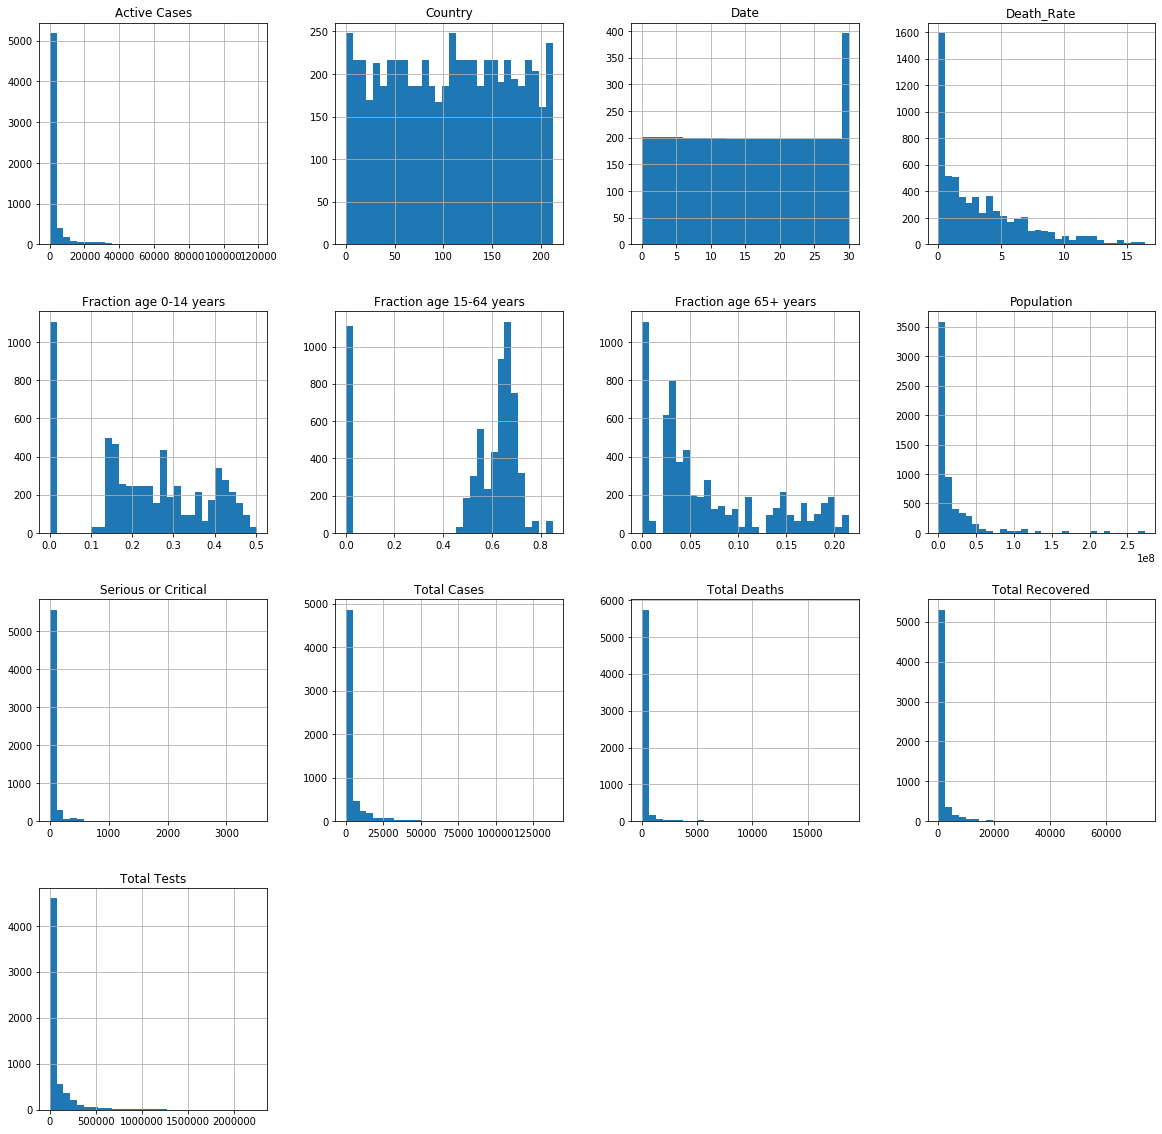

In [110]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

In [111]:
# Checking for skewness
df.skew()
# We need to treat

Date                        0.007462
Country                    -0.003512
Population                  4.016079
Total Tests                 4.562065
Total Cases                 5.246104
Total Deaths                8.735624
Total Recovered             7.237461
Serious or Critical         9.534256
Active Cases                6.188588
Death_Rate                  1.226873
Fraction age 0-14 years    -0.140870
Fraction age 15-64 years   -1.438346
Fraction age 65+ years      0.855685
dtype: float64

In [112]:
# Treating for skewness
for col in df.columns:
    if df[col].dtypes!="object":
        if df.skew().loc[col]>0.55:
            df[col]=np.log1p(df[col])
        if df.skew().loc[col]<-0.55:
            df[col]=np.square(df[col])
df.skew()

Date                        0.007462
Country                    -0.003512
Population                 -0.417061
Total Tests                -0.029476
Total Cases                -0.075375
Total Deaths                0.588336
Total Recovered            -0.015809
Serious or Critical         0.981023
Active Cases               -0.092964
Death_Rate                  0.010739
Fraction age 0-14 years    -0.140870
Fraction age 15-64 years   -0.913370
Fraction age 65+ years      0.790559
dtype: float64

In [113]:
df.isnull().sum()

Date                        0
Country                     0
Population                  0
Total Tests                 0
Total Cases                 0
Total Deaths                0
Total Recovered             0
Serious or Critical         0
Active Cases                0
Death_Rate                  0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
dtype: int64

In [114]:
# Let's Separate our dataset into Features and target
df_x=df.drop(columns=["Death_Rate"])
y=df[["Death_Rate"]]

In [115]:
# Let's do Standard Scaling on the Continous variables (x)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,-1.667728,0.857263,1.764537,2.316376,1.746877,1.322261,1.221423,0.265425,1.872639,-0.382426,0.750411,1.201622
1,-1.556148,0.857263,1.764537,2.346872,1.807408,1.384753,1.250944,0.265425,1.930261,-0.382426,0.750411,1.201622
2,-1.444567,0.857263,1.764537,2.377184,1.845101,1.435144,1.269365,2.543344,1.965948,-0.382426,0.750411,1.201622
3,-1.332986,0.857263,1.764537,2.399989,1.889999,1.487127,1.316122,2.543344,2.006689,-0.382426,0.750411,1.201622
4,-1.221406,0.857263,1.764537,2.426275,1.927562,1.538763,1.369003,2.543344,2.039694,-0.382426,0.750411,1.201622


In [116]:
#to find random stat which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [117]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [118]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

max r2 score corresponding to  49  is  0.6355761405860718


In [119]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,50,100,150,200,250,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 150}

In [120]:
rfr=RandomForestRegressor(n_estimators=150)
r_state=maxr2_score(rfr,x,y)

max r2 score corresponding to  67  is  0.9991359853182504


In [121]:
# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,20)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 19}

In [122]:
knr=KNeighborsRegressor(n_neighbors=19)
r_state=maxr2_score(knr,x,y)

max r2 score corresponding to  58  is  0.8732072805189618


In [123]:
# SVM

from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [124]:
svr=SVR(kernel="rbf",C=1)
r_state=maxr2_score(svr,x,y) 

max r2 score corresponding to  44  is  0.9638114456629824


# Cross Validation

In [125]:
print("\n\nLinear Regression\n\n")
model_evaluation(lr,x,y)

print("\n\nRandomForestRegressor\n\n")
model_evaluation(rfr,x,y)


print("\n\nKNeighborsRegressor\n\n")
model_evaluation(knr,x,y)

print("\n\nSVM REGRESSOR\n\n")
model_evaluation(svr,x,y)



Linear Regression


Mean r2 score for regressor:  0.17998765566400823
standard deviation in r2 score for regressor:  0.5422309924004205
[-0.57300991  0.63628676  0.70187658  0.51300134 -0.37821649]


RandomForestRegressor


Mean r2 score for regressor:  0.6897154788263
standard deviation in r2 score for regressor:  0.19278380483363391
[0.4361893  0.52248492 0.8707314  0.68293321 0.93623856]


KNeighborsRegressor


Mean r2 score for regressor:  0.01901959813116445
standard deviation in r2 score for regressor:  0.10401419976449897
[ 0.17810086  0.04471897 -0.03046384  0.04227256 -0.13953056]


SVM REGRESSOR


Mean r2 score for regressor:  0.7449027629346442
standard deviation in r2 score for regressor:  0.20037148572914923
[0.49480188 0.92984054 0.90785337 0.88660955 0.50540847]


In [126]:
# Based on above results let's select SVM

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 44,test_size=0.20)
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

In [128]:
#Lets find the rmse and r2_score using sklearn.metrics for SVM model
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  0.15839202405130828
r2_score is:  0.9638114456629824


In [130]:
import joblib
joblib.dump(svr,'Country_wide_Covid19.pkl')

['Country_wide_Covid19.pkl']